Data -> algorithm & model (logistic regression generates a filter of parameters)-> prediction (binary probability attribution by sigmoid function)

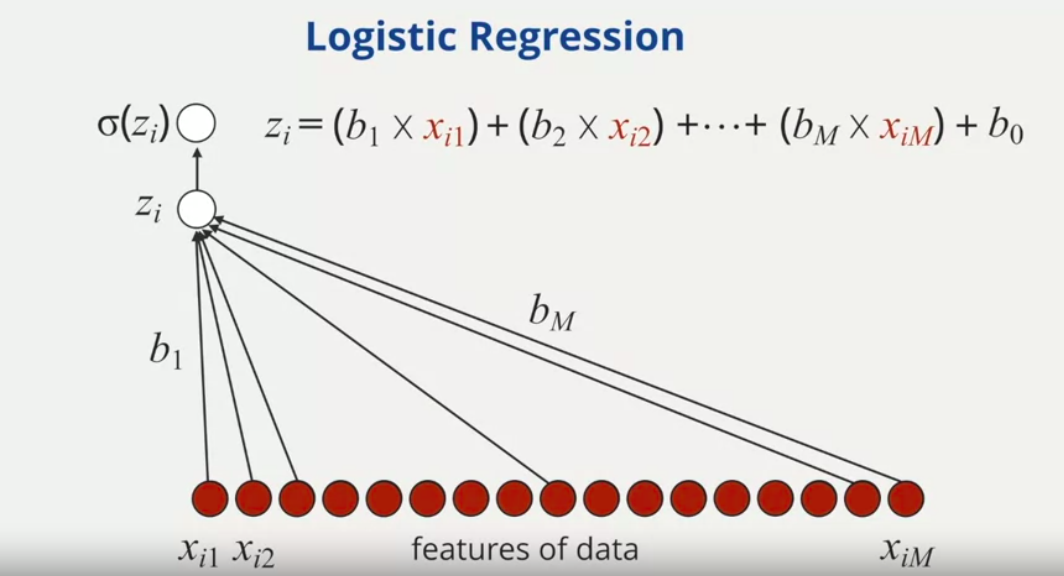

In [19]:
from IPython.display import Image
Image("model_image.png",width = 200, height = 100)

- logistic regression predicts binary outcomes

Logistic regression is good for linear problems:
- linear classifier can easily distinguish between class 1 and 0
- the data can be separated by a line in the data-space
- if the decision boundary is not linear (not a line), this model does not work properly

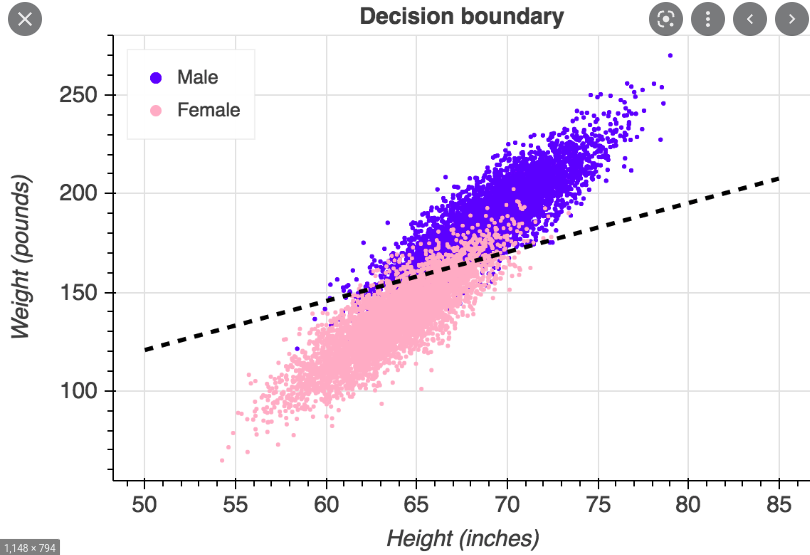

In [22]:
Image("decision_boundary.png")

Work with the logistic regression implementation using the https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
#import data
data = pd.read_csv("data.csv")

Pre-processing

In [3]:
data.head()
# I will erase the last column that just has NaN values for all rows and the Id column
data.drop(['Unnamed: 32', "id"],axis=1,inplace = True)
#I will change the output (diagnosis columns) to a binary one: M(maligmn) = 1, B(benigm)=0 
data.diagnosis = [1 if x == 'M' else 0 for x in data.diagnosis]
#the output is the y (prediction) and  is separeted from the x (data)
y = data.diagnosis.values
x_data = data.drop(['diagnosis'],axis =1)

In [4]:
# normalization of the data in ([0,1] interval):
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data))

Train test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

algorithm of sklearn

In [6]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [7]:
logreg.score(X_test,y_test) #mean accuracy
#In multilabel classification, this function computes subset accuracy: the set of labels predicted for a
# sample must exactly match the corresponding set of labels in y_true.


0.9767441860465116